In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Electrical_vehicle_dataset.csv')
data.head(10)

,Model,Rated Power (W),Max Power(W),Top Speed(kmph),Battery Capacity(kwh),Charging Time(Hrs),Range(km)
0,Revolt RV 400,3000.0,NaN,65.0,3.24,4.5,150.0
1,Revolt RV 300,1500.0,NaN,45.0,2.70,4.2,180.0
2,Ultraviolette F77,12500.0,25000.0,147.0,4.20,5.0,150.0
3,Ather 450,3300.0,5400.0,80.0,2.70,5.0,75.0
4,Ather 450X,3300.0,6000.0,80.0,2.90,5.0,85.0
5,Bajaj Chetak,3800.0,4080.0,78.0,3.00,5.0,95.0
6,TVS iQube Electric,NaN,4400.0,78.0,4.50,5.0,75.0
7,Okiva iPraise,1000.0,2500.0,58.0,3.30,4.0,160.0
8,Hero Photon,1000.0,1500.0,45.0,2.70,5.0,110.0
9,Ampere Magnus Pro,1200.0,NaN,55.0,1.80,5.0,80.0


In [3]:
data = data.drop(['Model'],axis=1)
print(data.shape)

data = data.drop_duplicates()
print(data.shape)

data.isnull().sum()

(105, 6)
(97, 6)


Rated Power (W)          1
Max Power(W)             7
Top Speed(kmph)          1
Battery Capacity(kwh)    0
Charging Time(Hrs)       0
Range(km)                0
dtype: int64

In [4]:
mean = dict(data.mean())
data['Rated Power (W)'] = data['Rated Power (W)'].fillna(mean['Rated Power (W)'])
data['Max Power(W)']    = data['Max Power(W)'].fillna(mean['Max Power(W)'])
data['Top Speed(kmph)'] = data['Top Speed(kmph)'].fillna(mean['Top Speed(kmph)'])

print(data.isnull().sum())
data = np.array(data)

Rated Power (W)          0
Max Power(W)             0
Top Speed(kmph)          0
Battery Capacity(kwh)    0
Charging Time(Hrs)       0
Range(km)                0
dtype: int64


In [5]:
data = np.array(data)
X = data[:,:-1]
Y = data[:,-1]
#print(X)
#print(Y)

In [6]:
from sklearn.metrics import mean_squared_error as mse

Linear Regression
mean_squared_error :  1328.2696090948175


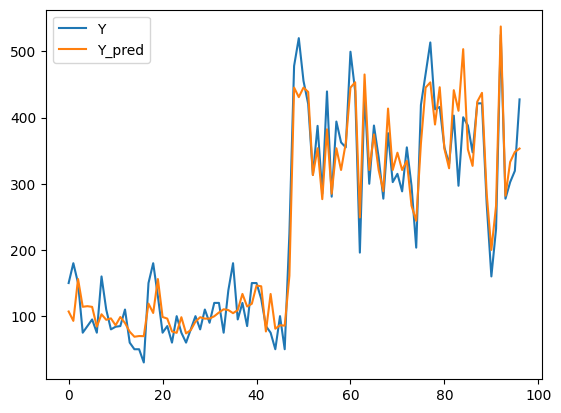

In [7]:
# Multiple Linear Regression

from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X,Y)

Y_pred = Lr.predict(X)

plt.plot(Y)
plt.plot(Y_pred)
plt.legend(['Y','Y_pred'])

mse_Lr = mse(Y,Y_pred)
print('Linear Regression\nmean_squared_error : ',mse_Lr)

Random Forest
mean_squared_error :  351.25073879538064


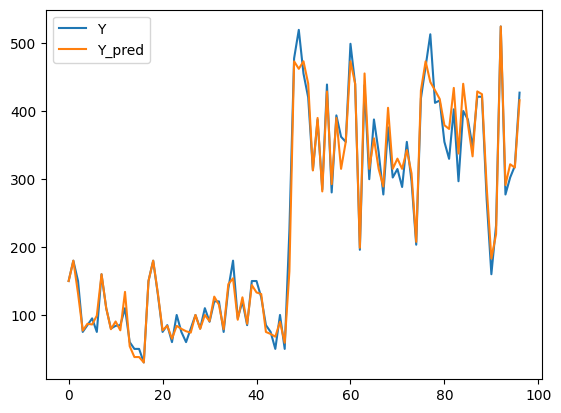

In [8]:
# Random Forest Regresion

from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators = 5,random_state = 0)
random_forest.fit(X,Y)

Y_pred = random_forest.predict(X)

plt.plot(Y)
plt.plot(Y_pred)
plt.legend(['Y','Y_pred'])

mse_random_forest = mse(Y,Y_pred)
print('Random Forest\nmean_squared_error : ', mse_random_forest)

Polynomial Regression
mean_squared_error :  694.5035227724243


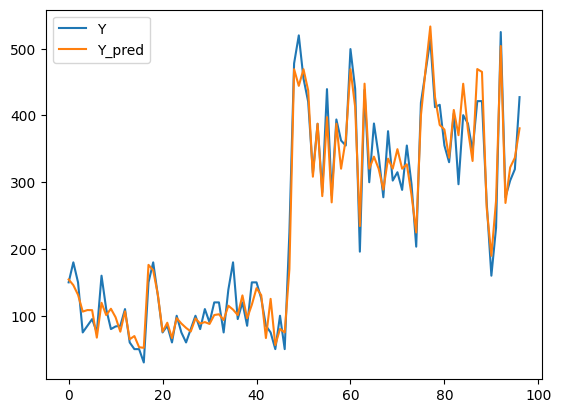

In [9]:
# Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures
poly_ft = PolynomialFeatures(degree = 2)

X_poly = poly_ft.fit_transform(X)

poly = LinearRegression()
poly.fit(X_poly,Y)

Y_pred = poly.predict(X_poly)

plt.plot(Y)
plt.plot(Y_pred)
plt.legend(['Y','Y_pred'])

mse_poly = mse(Y,Y_pred)
print('Polynomial Regression\nmean_squared_error : ', mse_poly)

Support Vector Machine
mean_squared_error :  17971.598371436994


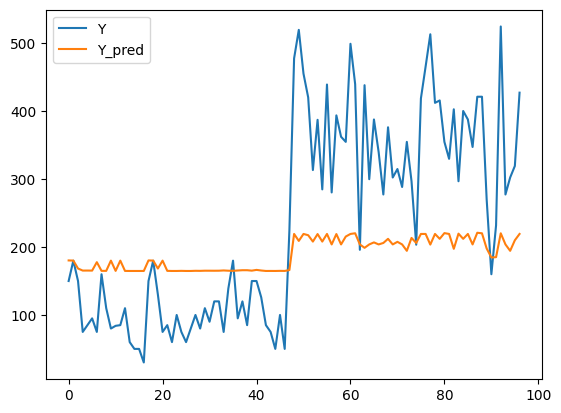

In [10]:
# Support Vector Regressoion

from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X, Y)

Y_pred = svr.predict(X)

plt.plot(Y)
plt.plot(Y_pred)
plt.legend(['Y','Y_pred'])

mse_svr = mse(Y,Y_pred)
print('Support Vector Machine\nmean_squared_error : ', mse_svr)

Mean Sqaured Error : 
 [np.float64(1328.2696090948175), np.float64(351.25073879538064), np.float64(694.5035227724243), np.float64(17971.598371436994)]


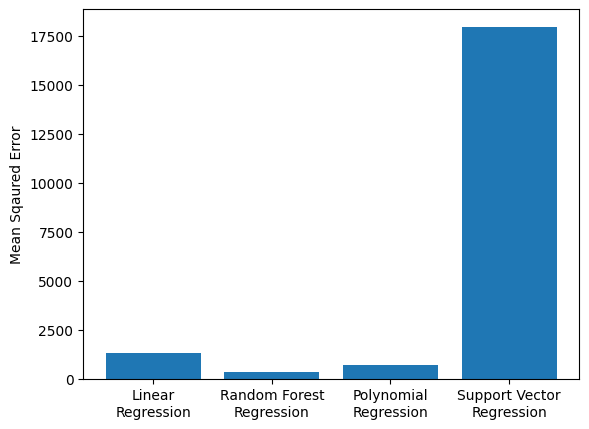

In [11]:
labels = ['Linear\nRegression', 'Random Forest\nRegression', 'Polynomial\nRegression', 'Support Vector\nRegression']
plt.bar( labels, [mse_Lr, mse_random_forest, mse_poly, mse_svr])
plt.ylabel('Mean Sqaured Error')
print('Mean Sqaured Error : \n',[mse_Lr, mse_random_forest, mse_poly, mse_svr])

In [12]:
# Rated Power (W)   Max Power(W)    Top Speed(kmph)    Battery Capacity(kwh)    Charging Time(Hrs)
#X_in = [1667,2500,60,2.880,5.5]

X_in = [800, 1900, 50, 1.68, 7.5]

#X_in = [12500, 25000, 147, 4.20, 5]

print('Linear Regression         :', Lr.predict([X_in])[0] ,'KM')
print('Random Forest Regression  :', random_forest.predict([X_in])[0] ,'KM')
print('Polynomial Regression     :', poly.predict(poly_ft.transform([X_in]))[0] ,'KM') 
print('Support Vector Regression :', svr.predict(X)[0] ,'KM') 

Linear Regression         : 98.18261723463044 KM
Random Forest Regression  : 79.5 KM
Polynomial Regression     : 85.22240021311677 KM
Support Vector Regression : 180.33405785540904 KM
